# Image Classification using Transfer Learning (CIFAR-10)

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [8]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [9]:
# Normalize the pixel values to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
# Define class labels for CIFAR-10
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
               "Dog", "Frog", "Horse", "Ship", "Truck"]

In [11]:
# Load Pre-trained MobileNetV2 model (without the top layers)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

C:\Users\swaro\AppData\Local\Temp\ipykernel_10732\3509572962.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(32, 32, 3))


In [12]:
# Freeze the base model layers
base_model.trainable = False

In [13]:

# Create a new model on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(10, activation="softmax")(x)  # 10 output classes

In [14]:
# Create the final model
model = Model(inputs=base_model.input, outputs=output)

In [15]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.2474 - loss: 2.0670 - val_accuracy: 0.3151 - val_loss: 1.8817
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.3180 - loss: 1.8810 - val_accuracy: 0.3319 - val_loss: 1.8444
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.3283 - loss: 1.8424 - val_accuracy: 0.3381 - val_loss: 1.8259
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.3336 - loss: 1.8283 - val_accuracy: 0.3438 - val_loss: 1.8124
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 93ms/step - accuracy: 0.3423 - loss: 1.8107 - val_accuracy: 0.3478 - val_loss: 1.8049


In [17]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.3528 - loss: 1.7999
Test Accuracy: 34.78%


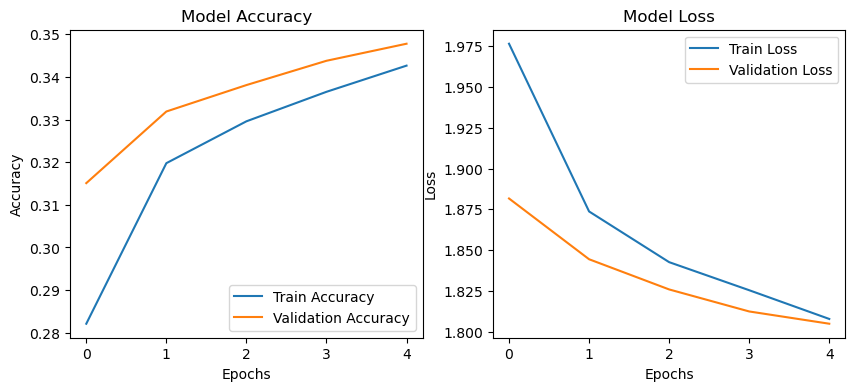

In [18]:
# Plot Training History
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()